In [6]:
# importing libraries 
import os
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
import datetime as datetime
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import AdaBoostRegressor as ADB
import xgboost as xg
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
# import ps data 
ps_data=pd.read_excel("D:\Office work\Sandfusion\Preparedsand_01-Feb-2020_TO_25-Sep-2021_HPML .xlsx",skiprows=[0,1,2,3,4])
print(ps_data.shape)

(1998, 30)


In [9]:
ps_data.head(10)

,Date,Time,Shift,Heat No.,Component Id,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),...,Friability Index (%),GFN/AFS (no),Oolitics (%),Cone Jolt Test (no),Temp. of Sand before mix.(C),Temp. of Sand after mix.(C),Ambient Temperature (C),Relative Humidity (%),Split Strength (psi),Dry Compression Strength (gm/cm2)
0,2020-02-01,09:00,A,NaN,CBCMVR,22.5,41,8.6,18.7,5.30,...,NaN,NaN,NaN,NaN,27.8,NaN,NaN,NaN,3.3,NaN
1,2020-02-01,15:20,B,NaN,CB6BT,22.0,37,8.4,17.6,5.23,...,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,3.2,NaN
2,2020-02-01,17:30,B,NaN,CBCMVR,22.5,36,NaN,18.4,5.00,...,NaN,NaN,NaN,NaN,34.8,NaN,NaN,NaN,3.3,NaN
3,2020-02-03,08:35,A,NaN,CB6BT,23.0,39,8.4,18.9,5.10,...,NaN,NaN,NaN,NaN,27.1,NaN,NaN,NaN,3.4,NaN
4,2020-02-03,10:20,A,NaN,CB6BT,22.5,38,NaN,17.7,5.20,...,NaN,NaN,NaN,NaN,26.9,NaN,NaN,NaN,3.3,NaN
5,2020-02-03,12:50,A,NaN,CB6BT,23.0,38,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28.5,NaN,NaN,NaN,3.4,NaN
6,2020-02-03,15:15,B,NaN,CBCMVR,23.5,38,8.2,17.6,5.30,...,NaN,NaN,NaN,NaN,28.6,NaN,NaN,NaN,3.7,NaN
7,2020-02-03,17:15,B,NaN,CBCMVR,24.0,36,NaN,18.2,5.45,...,NaN,NaN,NaN,NaN,34.2,NaN,NaN,NaN,3.6,NaN
8,2020-02-03,18:25,B,NaN,CBCMVR,21.5,34,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34.9,NaN,NaN,NaN,3.2,NaN
9,2020-02-03,20:35,B,NaN,CBCMVR,22.5,36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34.3,NaN,NaN,NaN,3.5,NaN


In [10]:
df=ps_data.dropna(axis=1,how='all',inplace=False)
print(df.shape)
df.head(10)

(1998, 17)


,Date,Time,Shift,Heat No.,Component Id,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Specimen Weight (gm),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi)
0,2020-02-01,09:00,A,NaN,CBCMVR,22.5,41,8.6,18.7,5.30,3.9,NaN,152.1,145,77,27.8,3.3
1,2020-02-01,15:20,B,NaN,CB6BT,22.0,37,8.4,17.6,5.23,4.0,3.3,151.2,140,74,28.0,3.2
2,2020-02-01,17:30,B,NaN,CBCMVR,22.5,36,NaN,18.4,5.00,3.8,NaN,151.4,140,75,34.8,3.3
3,2020-02-03,08:35,A,NaN,CB6BT,23.0,39,8.4,18.9,5.10,4.0,3.4,151.2,140,76,27.1,3.4
4,2020-02-03,10:20,A,NaN,CB6BT,22.5,38,NaN,17.7,5.20,4.1,NaN,151.6,135,74,26.9,3.3
5,2020-02-03,12:50,A,NaN,CB6BT,23.0,38,NaN,NaN,NaN,4.1,NaN,151.3,140,77,28.5,3.4
6,2020-02-03,15:15,B,NaN,CBCMVR,23.5,38,8.2,17.6,5.30,4.1,3.5,151.2,135,72,28.6,3.7
7,2020-02-03,17:15,B,NaN,CBCMVR,24.0,36,NaN,18.2,5.45,3.9,NaN,150.7,140,76,34.2,3.6
8,2020-02-03,18:25,B,NaN,CBCMVR,21.5,34,NaN,NaN,NaN,3.6,NaN,151.5,130,70,34.9,3.2
9,2020-02-03,20:35,B,NaN,CBCMVR,22.5,36,NaN,NaN,NaN,3.8,NaN,150.8,135,75,34.3,3.5


In [11]:
df=df.drop(['Specimen Weight (gm)'],axis=1)

In [12]:
df=pd.DataFrame(df)
df.head()

,Date,Time,Shift,Heat No.,Component Id,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi)
0,2020-02-01,09:00,A,NaN,CBCMVR,22.5,41,8.6,18.7,5.30,3.9,NaN,145,77,27.8,3.3
1,2020-02-01,15:20,B,NaN,CB6BT,22.0,37,8.4,17.6,5.23,4.0,3.3,140,74,28.0,3.2
2,2020-02-01,17:30,B,NaN,CBCMVR,22.5,36,NaN,18.4,5.00,3.8,NaN,140,75,34.8,3.3
3,2020-02-03,08:35,A,NaN,CB6BT,23.0,39,8.4,18.9,5.10,4.0,3.4,140,76,27.1,3.4
4,2020-02-03,10:20,A,NaN,CB6BT,22.5,38,NaN,17.7,5.20,4.1,NaN,135,74,26.9,3.3


In [13]:
#df['Date']=pd.to_datetime(df.Date)
#print(type("Date"))

In [14]:
df1=df.groupby(["Date"],as_index=False).mean()
print(type("Date"))
print(df1.shape)
df1.head(10)

<class 'str'>
(386, 12)


,Date,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi)
0,2020-02-01,22.333333,38.000000,8.5,18.233333,5.176667,3.900000,3.30,141.666667,75.333333,30.200000,3.266667
1,2020-02-03,22.857143,37.000000,8.3,18.100000,5.262500,3.942857,3.45,136.428571,74.285714,30.642857,3.442857
2,2020-02-04,22.583333,36.666667,8.1,18.150000,5.125000,3.883333,3.30,136.666667,75.666667,35.083333,3.483333
3,2020-02-05,23.250000,36.000000,8.1,18.825000,5.137500,3.783333,3.35,136.666667,76.166667,34.950000,3.500000
4,2020-02-06,22.583333,36.833333,8.2,19.000000,5.280000,3.816667,3.30,136.666667,76.666667,31.450000,3.500000
5,2020-02-07,23.500000,36.000000,7.6,18.800000,5.033333,3.825000,3.40,136.250000,74.750000,28.225000,3.525000
6,2020-02-08,22.300000,37.200000,8.0,18.800000,5.166667,3.800000,3.35,138.000000,75.000000,28.820000,3.320000
7,2020-02-10,22.500000,38.000000,8.6,18.800000,5.400000,3.700000,NaN,140.000000,77.333333,26.233333,3.566667
8,2020-02-11,22.666667,38.000000,8.8,18.500000,5.375000,3.833333,3.40,140.000000,77.000000,25.966667,3.366667
9,2020-02-12,23.500000,37.250000,8.8,19.200000,5.300000,3.875000,3.30,145.000000,78.500000,26.150000,3.700000


In [15]:
df3=df1.sort_values(by="Date")
df3.head()

,Date,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi)
0,2020-02-01,22.333333,38.000000,8.5,18.233333,5.176667,3.900000,3.30,141.666667,75.333333,30.200000,3.266667
1,2020-02-03,22.857143,37.000000,8.3,18.100000,5.262500,3.942857,3.45,136.428571,74.285714,30.642857,3.442857
2,2020-02-04,22.583333,36.666667,8.1,18.150000,5.125000,3.883333,3.30,136.666667,75.666667,35.083333,3.483333
3,2020-02-05,23.250000,36.000000,8.1,18.825000,5.137500,3.783333,3.35,136.666667,76.166667,34.950000,3.500000
4,2020-02-06,22.583333,36.833333,8.2,19.000000,5.280000,3.816667,3.30,136.666667,76.666667,31.450000,3.500000


In [16]:
df4=df3.round(2)
df4.head()

,Date,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi)
0,2020-02-01,22.33,38.00,8.5,18.23,5.18,3.90,3.30,141.67,75.33,30.20,3.27
1,2020-02-03,22.86,37.00,8.3,18.10,5.26,3.94,3.45,136.43,74.29,30.64,3.44
2,2020-02-04,22.58,36.67,8.1,18.15,5.12,3.88,3.30,136.67,75.67,35.08,3.48
3,2020-02-05,23.25,36.00,8.1,18.83,5.14,3.78,3.35,136.67,76.17,34.95,3.50
4,2020-02-06,22.58,36.83,8.2,19.00,5.28,3.82,3.30,136.67,76.67,31.45,3.50


In [17]:
df4.isna().sum()

Date                              0
GCS (psi)                         0
Compactability (%)                0
Active Clay (%)                   4
Wet Tensile Strength (gm/cm2)     1
LOI (%)                           2
Moisture (%)                      0
Volatile Matter (%)              25
Permeability (no)                 0
Shatter Index No. (No)            0
Temp. of Sand before mix.(C)      0
Split Strength (psi)              0
dtype: int64

In [18]:
#df5=pd.isnull(df4)
#df5

In [19]:
df_final=df4.fillna(method='ffill')
print(df_final.shape)
df_final.head()

(386, 12)


,Date,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi)
0,2020-02-01,22.33,38.00,8.5,18.23,5.18,3.90,3.30,141.67,75.33,30.20,3.27
1,2020-02-03,22.86,37.00,8.3,18.10,5.26,3.94,3.45,136.43,74.29,30.64,3.44
2,2020-02-04,22.58,36.67,8.1,18.15,5.12,3.88,3.30,136.67,75.67,35.08,3.48
3,2020-02-05,23.25,36.00,8.1,18.83,5.14,3.78,3.35,136.67,76.17,34.95,3.50
4,2020-02-06,22.58,36.83,8.2,19.00,5.28,3.82,3.30,136.67,76.67,31.45,3.50


In [20]:
df_final.isna().sum()

Date                             0
GCS (psi)                        0
Compactability (%)               0
Active Clay (%)                  0
Wet Tensile Strength (gm/cm2)    0
LOI (%)                          0
Moisture (%)                     0
Volatile Matter (%)              0
Permeability (no)                0
Shatter Index No. (No)           0
Temp. of Sand before mix.(C)     0
Split Strength (psi)             0
dtype: int64

In [21]:
# import sand fusiondata
sf=pd.read_excel("D:\Office work\Sandfusion\Sandfusion_01-Feb-2020_TO_13-Sep-2021_HPML .xlsx")
print(sf.shape)

(373, 7)


C:\Users\DELL\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [22]:
sf.head()


,Date,No of castings checked,OK,Minor,Major,Very high,Sand fusion weightage
0,2020-02-01,5,2,2,1,0,7.40
1,2020-02-03,6,2,3,1,0,7.33
2,2020-02-04,5,2,2,1,0,7.40
3,2020-02-05,5,2,2,1,0,7.40
4,2020-02-06,8,3,4,1,0,7.63


In [23]:
sf=sf[["Date","Sand fusion weightage"]]
sf.head()

,Date,Sand fusion weightage
0,2020-02-01,7.40
1,2020-02-03,7.33
2,2020-02-04,7.40
3,2020-02-05,7.40
4,2020-02-06,7.63


In [24]:
data=pd.merge(df_final,sf,how='inner',on='Date')
print(data.shape)
data.head()

(368, 13)


,Date,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi),Sand fusion weightage
0,2020-02-01,22.33,38.00,8.5,18.23,5.18,3.90,3.30,141.67,75.33,30.20,3.27,7.40
1,2020-02-03,22.86,37.00,8.3,18.10,5.26,3.94,3.45,136.43,74.29,30.64,3.44,7.33
2,2020-02-04,22.58,36.67,8.1,18.15,5.12,3.88,3.30,136.67,75.67,35.08,3.48,7.40
3,2020-02-05,23.25,36.00,8.1,18.83,5.14,3.78,3.35,136.67,76.17,34.95,3.50,7.40
4,2020-02-06,22.58,36.83,8.2,19.00,5.28,3.82,3.30,136.67,76.67,31.45,3.50,7.63


In [25]:
#data=data.sort_values(by="Date")
#data.head()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='Shatter Index No. (No)', ylabel='Density'>

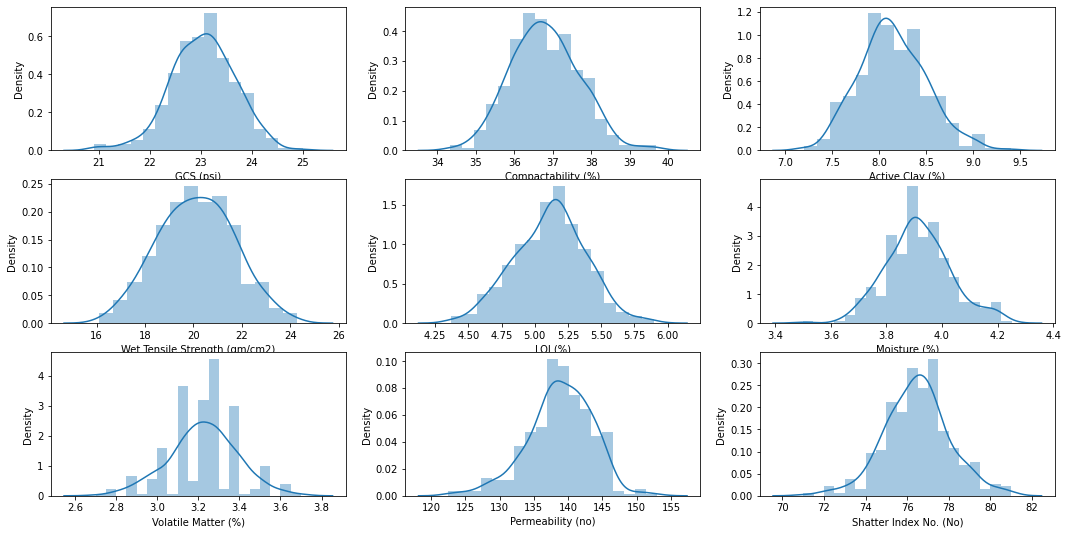

In [26]:
plt.figure(figsize=(18,9))
plt.subplot(3,3,1)
sns.distplot(data["GCS (psi)"])
plt.subplot(3,3,2)
sns.distplot(data["Compactability (%)"])
plt.subplot(3,3,3)
sns.distplot(data["Active Clay (%)"])
plt.subplot(3,3,4)
sns.distplot(data["Wet Tensile Strength (gm/cm2)"])
plt.subplot(3,3,5)
sns.distplot(data["LOI (%)"])
plt.subplot(3,3,6)
sns.distplot(data["Moisture (%)"])
plt.subplot(3,3,7)
sns.distplot(data["Volatile Matter (%)"])
plt.subplot(3,3,8)
sns.distplot(data["Permeability (no)"])
plt.subplot(3,3,9)
sns.distplot(data["Shatter Index No. (No)"])



C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='Sand fusion weightage', ylabel='Density'>

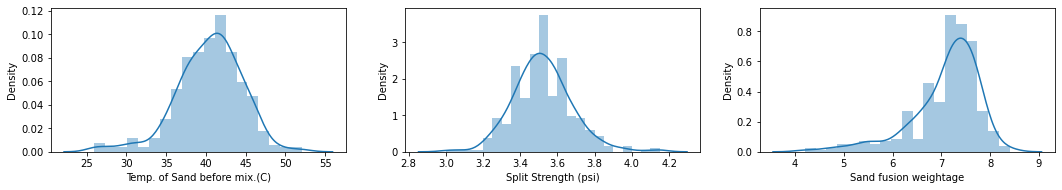

In [27]:
plt.figure(figsize=(18,9))
plt.subplot(3,3,1)
sns.distplot(data["Temp. of Sand before mix.(C)"])
plt.subplot(3,3,2)
sns.distplot(data["Split Strength (psi)"])
plt.subplot(3,3,3)
sns.distplot(data["Sand fusion weightage"])


In [28]:
# finiding the pearson correlation coefficients between variables 
data_cr=data.corr(method="pearson",min_periods=10)
data_cr.round(2)

,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi),Sand fusion weightage
GCS (psi),1.00,-0.06,0.18,0.35,-0.09,0.06,-0.13,0.11,0.54,-0.10,0.59,-0.18
Compactability (%),-0.06,1.00,-0.01,0.07,0.00,0.42,0.18,0.12,0.25,-0.31,0.04,0.09
Active Clay (%),0.18,-0.01,1.00,0.05,-0.10,0.30,0.16,-0.21,0.28,-0.09,0.39,-0.03
Wet Tensile Strength (gm/cm2),0.35,0.07,0.05,1.00,0.25,0.27,0.02,0.24,0.28,-0.08,0.22,-0.29
LOI (%),-0.09,0.00,-0.10,0.25,1.00,0.18,0.39,0.09,-0.15,-0.30,-0.23,-0.11
Moisture (%),0.06,0.42,0.30,0.27,0.18,1.00,0.21,-0.23,0.33,-0.23,0.27,0.05
Volatile Matter (%),-0.13,0.18,0.16,0.02,0.39,0.21,1.00,-0.04,0.00,-0.19,-0.07,0.05
Permeability (no),0.11,0.12,-0.21,0.24,0.09,-0.23,-0.04,1.00,0.15,-0.01,-0.05,-0.36
Shatter Index No. (No),0.54,0.25,0.28,0.28,-0.15,0.33,0.00,0.15,1.00,-0.06,0.65,-0.15
Temp. of Sand before mix.(C),-0.10,-0.31,-0.09,-0.08,-0.30,-0.23,-0.19,-0.01,-0.06,1.00,-0.01,0.05


In [29]:
filtered_data= data.iloc[90,:]
print(filtered_data)

Date                             2020-09-08 00:00:00
GCS (psi)                                      23.25
Compactability (%)                             36.25
Active Clay (%)                                  8.4
Wet Tensile Strength (gm/cm2)                   19.3
LOI (%)                                         4.75
Moisture (%)                                    3.88
Volatile Matter (%)                              3.0
Permeability (no)                              132.5
Shatter Index No. (No)                         75.75
Temp. of Sand before mix.(C)                   45.95
Split Strength (psi)                             3.6
Sand fusion weightage                           7.29
Name: 90, dtype: object


In [30]:
df_f=data[data['Date'] == '28-04-2021']
df_f


,Date,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi),Sand fusion weightage
276,2021-04-28,22.6,37.4,7.57,20.48,5.1,3.94,3.2,144.0,74.2,43.22,3.42,7.7


In [31]:
# filtering the data that contains sf >=7.5 values from final dataframe
data_final=data[data['Sand fusion weightage'] > 7.5]
print(data_final.shape)
data_final.head(10)

(96, 13)


,Date,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi),Sand fusion weightage
4,2020-02-06,22.58,36.83,8.2,19.00,5.28,3.82,3.30,136.67,76.67,31.45,3.50,7.63
5,2020-02-07,23.50,36.00,7.6,18.80,5.03,3.82,3.40,136.25,74.75,28.22,3.53,7.71
6,2020-02-08,22.30,37.20,8.0,18.80,5.17,3.80,3.35,138.00,75.00,28.82,3.32,7.83
7,2020-02-10,22.50,38.00,8.6,18.80,5.40,3.70,3.35,140.00,77.33,26.23,3.57,7.71
9,2020-02-12,23.50,37.25,8.8,19.20,5.30,3.88,3.30,145.00,78.50,26.15,3.70,7.71
11,2020-02-21,22.67,39.33,8.2,18.75,5.28,4.07,3.50,133.33,77.67,27.87,3.30,7.71
15,2020-02-27,22.50,36.67,7.7,17.70,5.10,3.73,3.30,133.33,75.33,35.10,3.33,7.60
17,2020-02-29,22.62,37.25,8.2,17.30,5.03,3.78,3.40,141.25,75.50,36.62,3.25,7.60
19,2020-03-03,22.50,37.67,8.3,17.05,4.97,3.83,3.25,140.83,76.17,40.97,3.32,7.73
21,2020-03-05,23.08,36.67,8.1,17.50,5.08,3.90,3.20,135.83,76.50,37.63,3.50,7.56


In [32]:
# defining x and y 
x=data.iloc[:,1:-1]
x.head()

,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi)
0,22.33,38.00,8.5,18.23,5.18,3.90,3.30,141.67,75.33,30.20,3.27
1,22.86,37.00,8.3,18.10,5.26,3.94,3.45,136.43,74.29,30.64,3.44
2,22.58,36.67,8.1,18.15,5.12,3.88,3.30,136.67,75.67,35.08,3.48
3,23.25,36.00,8.1,18.83,5.14,3.78,3.35,136.67,76.17,34.95,3.50
4,22.58,36.83,8.2,19.00,5.28,3.82,3.30,136.67,76.67,31.45,3.50


In [33]:
y=data.iloc[:,-1]
y.head()

0    7.40
1    7.33
2    7.40
3    7.40
4    7.63
Name: Sand fusion weightage, dtype: float64

In [34]:
# spliting the data into train and test 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=None)
print(x_train.shape)
x_train.head()

(276, 11)


,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi)
262,23.36,38.43,8.0,21.27,5.11,3.99,3.30,145.00,77.29,36.94,3.51
4,22.58,36.83,8.2,19.00,5.28,3.82,3.30,136.67,76.67,31.45,3.50
136,23.25,38.00,8.5,21.03,4.93,3.98,3.25,141.67,78.17,42.15,3.73
15,22.50,36.67,7.7,17.70,5.10,3.73,3.30,133.33,75.33,35.10,3.33
215,22.83,36.67,7.8,20.75,5.29,3.88,3.23,135.83,74.17,43.28,3.32


In [35]:
import statsmodels.api as sm 
model=sm.OLS(y,x).fit()
#model.params

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Sand fusion weightage   R-squared (uncentered):                   0.992
Model:                               OLS   Adj. R-squared (uncentered):              0.992
Method:                    Least Squares   F-statistic:                              3943.
Date:                   Tue, 28 Sep 2021   Prob (F-statistic):                        0.00
Time:                           13:01:28   Log-Likelihood:                         -359.97
No. Observations:                    368   AIC:                                      741.9
Df Residuals:                        357   BIC:                                      784.9
Df Model:                             11                                                  
Covariance Type:               nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
GCS (psi)                         0.0784      0.070      1.126      0.261      -0.059       0.215
Compactability (%)                0.2480      0.045      5.571      0.000       0.160       0.336
Active Clay (%)                  -0.0879      0.108     -0.812      0.418      -0.301       0.125
Wet Tensile Strength (gm/cm2)    -0.1230      0.025     -4.913      0.000      -0.172      -0.074
LOI (%)                           0.2162      0.153      1.412      0.159      -0.085       0.517
Moisture (%)                      0.2996      0.398      0.753      0.452      -0.483       1.082
Volatile Matter (%)               0.3061      0.235      1.305      0.193      -0.155       0.767
Permeability (no)                -0.0337      0.008     -4.122      0.000      -0.050      -0.018
Shatter Index No. (No)           -0.0412      0.032     -1.301      0.194      -0.104       0.021
Temp. of Sand before mix.(C)      0.0347      0.008      4.199      0.000       0.018       0.051
Split Strength (psi)              0.7097      0.324      2.192      0.029       0.073       1.346
==============================================================================
Omnibus:                       63.568   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.246
Skew:                          -0.991   Prob(JB):                     1.15e-24
Kurtosis:                       4.807   Cond. No.                     2.05e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Normalize the data 


In [37]:
cols=['GCS (psi)','Compactability (%)', 'Active Clay (%)','Wet Tensile Strength (gm/cm2)', 'LOI (%)',
                 'Moisture (%)','Volatile Matter (%)','Permeability (no)','Shatter Index No. (No)',
                 'Temp. of Sand before mix.(C)','Split Strength (psi)']

In [38]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(x)
x_s=pd.DataFrame(scaled_data)
print(x_s.shape)
x_s.head()


(368, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,0.348780,0.687266,0.590909,0.259756,0.529412,0.533333,0.60,0.628525,0.433,0.161883,0.234783
1,0.478049,0.500000,0.500000,0.243902,0.581699,0.586667,0.75,0.456721,0.329,0.178722,0.382609
2,0.409756,0.438202,0.409091,0.250000,0.490196,0.506667,0.60,0.464590,0.467,0.348641,0.417391
3,0.573171,0.312734,0.409091,0.332927,0.503268,0.373333,0.65,0.464590,0.517,0.343666,0.434783
4,0.409756,0.468165,0.454545,0.353659,0.594771,0.426667,0.60,0.464590,0.567,0.209721,0.434783


In [39]:
x_s.columns=cols
x_s.head()


,GCS (psi),Compactability (%),Active Clay (%),Wet Tensile Strength (gm/cm2),LOI (%),Moisture (%),Volatile Matter (%),Permeability (no),Shatter Index No. (No),Temp. of Sand before mix.(C),Split Strength (psi)
0,0.348780,0.687266,0.590909,0.259756,0.529412,0.533333,0.60,0.628525,0.433,0.161883,0.234783
1,0.478049,0.500000,0.500000,0.243902,0.581699,0.586667,0.75,0.456721,0.329,0.178722,0.382609
2,0.409756,0.438202,0.409091,0.250000,0.490196,0.506667,0.60,0.464590,0.467,0.348641,0.417391
3,0.573171,0.312734,0.409091,0.332927,0.503268,0.373333,0.65,0.464590,0.517,0.343666,0.434783
4,0.409756,0.468165,0.454545,0.353659,0.594771,0.426667,0.60,0.464590,0.567,0.209721,0.434783


In [40]:
# Taking sclaed data as input to OLS model 
model=sm.OLS(y,x_s).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Sand fusion weightage   R-squared (uncentered):                   0.980
Model:                               OLS   Adj. R-squared (uncentered):              0.979
Method:                    Least Squares   F-statistic:                              1592.
Date:                   Tue, 28 Sep 2021   Prob (F-statistic):                   1.17e-295
Time:                           13:01:28   Log-Likelihood:                         -524.68
No. Observations:                    368   AIC:                                      1071.
Df Residuals:                        357   BIC:                                      1114.
Df Model:                             11                                                  
Covariance Type:               nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
GCS (psi)                         1.9851      0.464      4.276      0.000       1.072       2.898
Compactability (%)                2.5987      0.388      6.706      0.000       1.837       3.361
Active Clay (%)                   0.8036      0.375      2.143      0.033       0.066       1.541
Wet Tensile Strength (gm/cm2)    -1.3661      0.331     -4.127      0.000      -2.017      -0.715
LOI (%)                           1.9446      0.365      5.331      0.000       1.227       2.662
Moisture (%)                      1.4014      0.464      3.023      0.003       0.490       2.313
Volatile Matter (%)               1.2189      0.361      3.372      0.001       0.508       1.930
Permeability (no)                 0.7532      0.379      1.988      0.048       0.008       1.498
Shatter Index No. (No)           -1.5203      0.503     -3.024      0.003      -2.509      -0.532
Temp. of Sand before mix.(C)      4.1024      0.286     14.344      0.000       3.540       4.665
Split Strength (psi)              1.9610      0.590      3.322      0.001       0.800       3.122
==============================================================================
Omnibus:                        0.793   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.850
Skew:                          -0.110   Prob(JB):                        0.654
Kurtosis:                       2.914   Cond. No.                         21.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
y_pred=model.predict(x_s)
def adj_r2(r2,k=None):
    x = x_train
    y = y_train
    n = x.shape[0]
    if k == None:
        k = x.shape[1]
    adj_r2 = 1 - (((1 - r2)*(n-1))/(n-k-1))
    print(f"Adj r2 is {adj_r2}")

In [42]:
# model performance without  intercept for test data
ss_tot_test= np.sum( (y)**2 )
ss_res_test = np.sum( (y - y_pred)**2 )
r2_test=(1 - ss_res_test/ss_tot_test)
print(r2_test.round(2))
adj_r2(r2_test)

0.98
Adj r2 is 0.9791850723686661


## Features selection:

In [43]:
X1=x_s

In [44]:
for x in range(11):
    X1 = X1 [cols]
    ols = OLS(y,X1).fit()
    p_max = ols.pvalues.max()
    feature = ols.pvalues.idxmax()
    if p_max < 0.05:
        break
    cols.remove(feature)
    print(f"Removed feature: {feature} and it's pvalue is {round(p_max,2)}")
print(cols)
    

['GCS (psi)', 'Compactability (%)', 'Active Clay (%)', 'Wet Tensile Strength (gm/cm2)', 'LOI (%)', 'Moisture (%)', 'Volatile Matter (%)', 'Permeability (no)', 'Shatter Index No. (No)', 'Temp. of Sand before mix.(C)', 'Split Strength (psi)']


# 1 OLS Model without intercept and without normalization


In [45]:
model=LinearRegression(fit_intercept=False,normalize=False)
model=model.fit(x_train,y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


intercept: 0.0
slope: [ 0.07076611  0.24468108 -0.16655102 -0.09139304  0.17702782  0.61857844
  0.56298243 -0.04161038 -0.0467307   0.0350807   0.68541685]


In [46]:
def adj_r2(r2,k=None):
    x = x_train
    y = y_train
    n = x.shape[0]
    if k == None:
        k = x.shape[1]
    adj_r2 = 1 - (((1 - r2)*(n-1))/(n-k-1))
    print(f"Adj r2 is {adj_r2}")

In [47]:
y_pred_train = model.predict(x_train)
print(y_pred_train.round(2))

[7.07 6.9  7.26 7.18 7.22 7.16 6.78 7.35 7.79 7.06 6.82 7.19 6.83 7.46
 7.15 7.48 7.31 7.34 7.3  7.04 7.36 7.36 7.26 6.97 6.67 6.78 6.37 7.68
 7.1  6.68 8.01 6.15 6.39 8.02 6.99 7.02 6.88 7.3  7.3  6.88 7.41 7.22
 6.99 7.68 6.95 7.07 6.9  7.16 7.55 7.27 7.05 7.53 6.5  7.46 6.86 6.97
 6.68 7.   7.32 7.03 6.66 6.82 7.1  6.51 6.72 7.18 6.94 7.53 7.47 7.48
 6.74 6.76 6.96 6.9  7.08 7.23 6.97 6.47 7.27 6.84 7.4  7.52 6.52 6.86
 6.65 7.05 7.33 7.71 7.07 7.09 6.74 7.3  7.39 7.81 6.37 7.15 6.95 7.67
 7.37 6.91 6.96 6.81 7.45 6.79 6.53 7.01 7.44 7.15 7.37 7.19 6.55 7.12
 6.58 6.82 6.72 6.82 6.96 7.18 6.94 7.08 6.87 8.2  7.28 6.39 6.63 7.
 6.73 6.5  7.47 6.82 7.12 7.33 6.98 7.17 6.7  6.95 7.11 7.31 6.76 7.11
 6.85 6.97 8.32 7.26 6.26 6.9  7.12 6.66 7.49 7.74 6.62 6.67 7.77 6.86
 7.46 6.97 6.8  6.99 7.23 6.4  6.95 6.62 7.89 6.87 7.01 7.1  7.39 6.6
 7.04 6.54 6.99 6.59 7.09 6.57 7.04 6.76 7.5  7.31 7.45 7.8  6.82 7.48
 6.93 6.99 6.99 6.64 7.2  7.12 6.7  7.   7.24 6.99 6.36 7.08 7.18 6.71
 7.8  7.2

In [48]:
y_pred_test=model.predict(x_test)
y_pred_test.round(2)

array([7.44, 7.5 , 6.65, 7.14, 7.19, 7.04, 7.32, 7.16, 8.4 , 7.61, 6.69,
       6.62, 7.29, 6.78, 6.9 , 7.63, 7.05, 7.31, 6.88, 6.65, 6.79, 7.2 ,
       7.19, 7.19, 6.74, 7.15, 7.99, 6.97, 6.8 , 7.92, 6.86, 6.7 , 6.83,
       6.96, 7.41, 7.03, 7.19, 6.51, 6.94, 7.23, 6.65, 7.33, 6.84, 6.57,
       7.66, 7.67, 6.67, 6.87, 6.92, 7.15, 7.5 , 6.88, 6.93, 7.26, 7.16,
       6.92, 7.17, 7.41, 7.23, 6.85, 6.49, 7.33, 6.58, 7.14, 7.07, 7.06,
       6.97, 6.77, 7.08, 7.22, 6.7 , 6.7 , 7.29, 7.77, 6.85, 6.98, 6.81,
       7.36, 6.93, 6.93, 6.83, 7.19, 7.63, 6.76, 6.63, 7.37, 6.88, 8.14,
       7.26, 6.84, 7.02, 6.88])

In [49]:
ss_tot = np.sum( (y_train)**2 )
ss_res = np.sum( (y_train - y_pred_train)**2 )
r2=(1 - ss_res/ss_tot)
print('coefficient of determination:', r2.round(2))

coefficient of determination: 0.99


In [50]:
adj_r2(r2)

Adj r2 is 0.9911188693448789


In [51]:
rmse_train1=np.sqrt(mse(y_train,y_pred_train))
print('rmse:', rmse_train1.round(2))

rmse: 0.66


In [52]:
rmse_test1=np.sqrt(mse(y_test,y_pred_test))
print('rmse:', rmse_test1.round(2))

rmse: 0.63


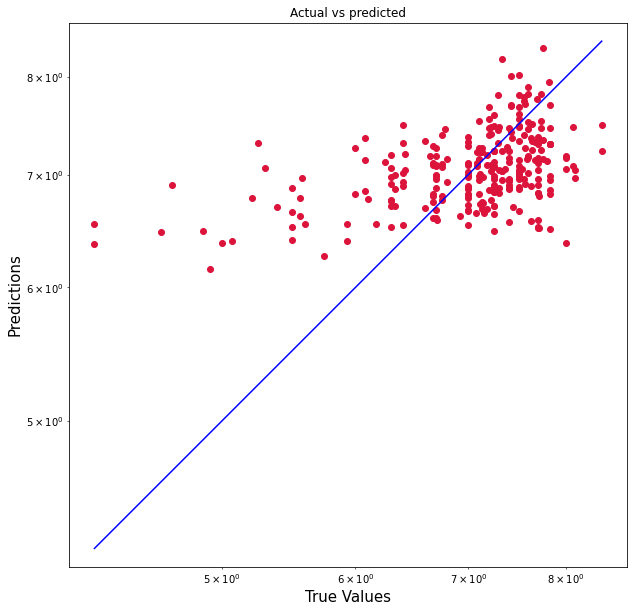

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred_train, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_train), max(y_train))
p2 = min(min(y_pred_train), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Actual vs predicted')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


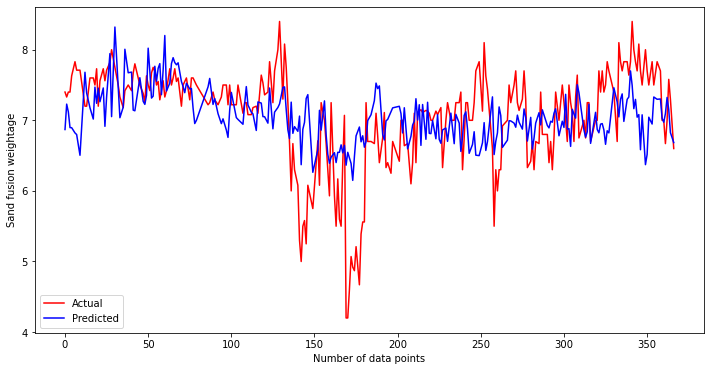

In [54]:
fig=plt.figure(figsize=(12,6))
sns.lineplot(x_train.index,y_train,color='red')
sns.lineplot(x_train.index,y_pred_train,color='blue')
plt.xlabel('Number of data points')

plt.legend(['Actual', 'Predicted'])


# 2 OLS Model with intercept and without normalization

In [55]:
model_1=LinearRegression(fit_intercept=True,normalize=False)
y_train1=y_train
x_train1=x_train
model_1=model_1.fit(x_train1,y_train1)

In [56]:
r_sq = model_1.score(x_train1, y_train1)
print('coefficient of determination:', r_sq.round(2))
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_.round(3))

coefficient of determination: 0.25
intercept: 14.68584045088906
slope: [-0.074  0.141 -0.307 -0.06  -0.166  0.235  0.509 -0.053 -0.075  0.014
  0.969]


In [57]:
adj_r2(r_sq)

Adj r2 is 0.21760816085547996


In [58]:
y_pred_train1 = model_1.predict(x_train1)
print(y_pred_train1.round(2))

[6.86 7.1  7.07 7.49 7.28 7.18 6.79 7.6  7.78 6.75 6.67 7.03 6.66 7.29
 6.89 7.36 7.06 7.49 7.16 7.31 7.46 7.38 7.31 6.99 6.91 6.95 6.53 7.72
 6.97 6.75 7.68 5.73 6.22 8.02 6.81 7.02 6.89 7.11 7.1  6.85 7.28 7.56
 7.03 7.57 7.37 7.05 7.22 7.52 7.82 7.23 7.01 7.38 6.71 7.46 7.11 6.94
 6.73 6.87 7.11 6.91 6.96 6.85 7.15 6.66 6.64 7.17 6.84 7.38 7.38 7.41
 6.61 6.84 6.91 6.99 6.93 7.31 7.17 6.38 7.57 6.83 7.31 7.6  6.81 6.9
 6.56 7.56 7.04 7.72 7.   7.5  6.42 7.15 7.42 7.76 6.55 7.06 7.1  7.68
 7.4  6.73 7.   6.7  7.49 6.55 6.65 6.94 7.4  7.18 7.19 6.92 6.51 6.87
 6.7  7.13 6.74 6.72 7.32 6.76 7.04 7.02 6.97 7.85 7.28 6.41 6.9  7.11
 6.74 6.45 7.41 7.02 6.97 7.13 7.   7.13 6.66 6.98 7.16 7.23 7.03 7.24
 6.92 6.88 8.04 7.14 6.44 7.1  7.31 6.49 7.12 7.29 6.78 6.84 7.78 7.14
 7.63 6.99 6.68 6.74 7.55 6.44 6.98 6.6  8.12 6.87 7.33 7.38 7.29 6.82
 6.85 6.37 6.65 6.68 6.92 6.86 6.96 6.98 7.61 7.43 7.39 7.68 6.73 7.56
 6.58 6.89 6.97 6.68 6.93 6.97 6.84 6.95 7.11 7.21 6.44 7.11 7.04 6.55
 7.87 7

In [59]:
y_pred_test1 = model_1.predict(x_test)

rmse_train2=np.sqrt(mse(y_train1,y_pred_train1))
print('rmse:', rmse_train2.round(2))

rmse_test2=np.sqrt(mse(y_test,y_pred_test1))
print('rmse_t2:', rmse_test2.round(2))

rmse: 0.63
rmse_t2: 0.59


In [60]:
r_sq_test= model_1.score(x_test, y_test)
print('coefficient of determination:', r_sq_test.round(2))
adj_r2(r_sq_test)

coefficient of determination: 0.12
Adj r2 is 0.07989206680859895


In [61]:
# model performance with  intercept for test data
ss_tot_test2= np.sum( (y_test-y_test.mean())**2 )
ss_res_test2 = np.sum( (y_test - y_pred_test1)**2 )
r2_test_2=(1 - ss_res_test2/ss_tot_test2)
print(r2_test_2.round(2))
adj_r2(r2_test_2)

0.12
Adj r2 is 0.07989206680859895


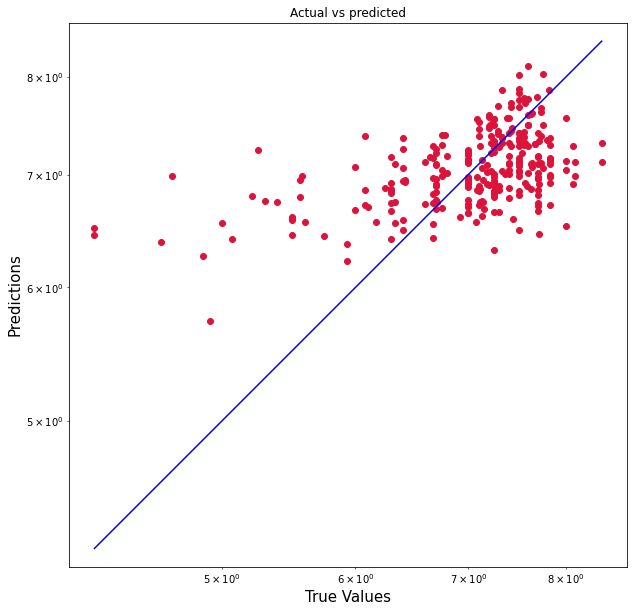

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(y_train1, y_pred_train1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_train1), max(y_train1))
p2 = min(min(y_pred_train1), min(y_train1))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Actual vs predicted')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


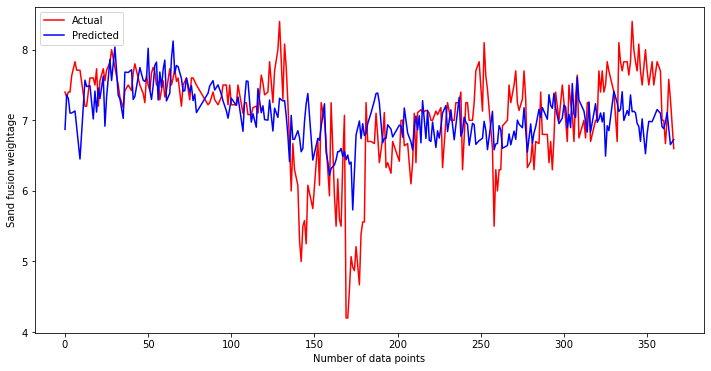

In [63]:
fig=plt.figure(figsize=(12,6))
sns.lineplot(x_train1.index,y_train1,color='red')
sns.lineplot(x_train1.index,y_pred_train1,color='blue')
plt.xlabel('Number of data points')

plt.legend(['Actual', 'Predicted'])

In [64]:
scaled_data=scaler.fit_transform(x_train)
type(scaled_data)

numpy.ndarray

In [65]:
x_train_scaled= pd.DataFrame(scaled_data)
print(x_train_scaled.shape)
x_train_scaled.head()

(276, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,0.600000,0.767790,0.40,0.622665,0.517483,0.573770,0.555556,0.730367,0.587778,0.452032,0.390476
1,0.409756,0.468165,0.50,0.339975,0.636364,0.295082,0.555556,0.449612,0.518889,0.222036,0.380952
2,0.573171,0.687266,0.65,0.592777,0.391608,0.557377,0.500000,0.618133,0.685556,0.670297,0.600000
3,0.390244,0.438202,0.25,0.178082,0.510490,0.147541,0.555556,0.337041,0.370000,0.374948,0.219048
4,0.470732,0.438202,0.30,0.557908,0.643357,0.393443,0.477778,0.421301,0.241111,0.717637,0.209524


In [66]:
x_test_scaled=scaler.transform(x_test)
x_test_scaled=pd.DataFrame(x_test_scaled)
x_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.419512,0.780899,0.400,0.551681,0.790210,0.918033,0.500000,0.519717,0.583333,0.456640,0.285714
1,0.268293,0.687266,0.600,0.582814,1.013986,0.836066,1.000000,0.561847,0.111111,0.463762,0.114286
2,0.600000,0.367041,0.400,0.750934,0.419580,0.409836,0.166667,0.537917,0.603333,0.735651,0.409524
3,0.390244,0.734082,0.250,0.844334,0.860140,0.557377,0.666667,0.646107,0.305556,0.421868,0.333333
4,0.600000,0.393258,0.385,0.474471,0.650350,0.196721,0.611111,0.393327,0.555556,0.602849,0.419048


# 3 OLS Model without intercept and with normalization

In [67]:
model=LinearRegression(fit_intercept=False,normalize=False)
model=model.fit(x_train_scaled,y_train)

In [68]:
print('intercept:', model.intercept_)
print('slope:', model.coef_.round(3))

intercept: 0.0
slope: [ 1.967  3.079  0.938 -0.707  2.415  0.586  1.129  0.199 -1.947  4.057
  1.979]


In [69]:
y_pred_trains = model.predict(x_train_scaled)
print(y_pred_trains.round(2))

[7.3  5.55 7.97 5.47 7.43 7.09 6.26 6.44 6.7  7.55 6.81 7.19 7.87 8.18
 8.38 8.   8.47 7.14 7.68 6.68 6.87 7.19 6.47 6.91 6.29 6.48 5.5  8.28
 7.88 6.44 8.63 6.53 6.7  8.52 7.79 6.31 6.89 8.18 8.12 7.15 7.16 6.36
 7.03 7.2  5.9  7.08 5.85 5.94 7.1  6.42 7.39 7.   5.64 6.83 6.3  7.18
 6.8  7.54 8.1  7.15 5.25 6.94 6.45 5.29 7.27 7.36 6.16 8.03 7.6  7.
 6.42 6.27 7.21 6.16 7.32 6.35 6.95 6.84 5.99 6.94 7.65 7.46 5.   6.77
 7.52 5.65 8.1  6.45 7.43 6.22 7.17 7.61 7.09 7.23 5.63 7.13 6.85 7.2
 7.48 7.37 6.39 6.95 6.76 7.18 5.74 6.88 7.77 7.1  8.58 7.77 6.55 7.97
 6.48 4.99 6.51 7.31 6.03 7.63 6.78 7.7  6.58 9.25 6.64 6.63 6.05 6.17
 6.68 5.72 7.21 6.42 7.18 7.76 7.22 7.6  6.82 7.05 7.16 7.67 6.35 6.81
 6.59 6.91 9.74 7.74 5.64 5.85 6.07 6.95 8.92 8.84 6.27 6.58 7.79 7.02
 7.02 6.67 6.49 7.29 5.99 6.81 7.35 6.7  7.21 5.9  6.16 6.77 8.54 4.91
 7.86 7.62 8.09 6.48 7.61 5.75 7.42 5.54 7.96 7.21 8.33 8.25 6.7  7.22
 8.02 7.24 7.25 6.4  7.33 7.16 5.86 6.51 7.76 6.67 6.07 6.67 7.89 7.47
 7.62 7.0

In [70]:
# model performance without  intercept for train data
ss_tot = np.sum( (y_train)**2 )
ss_res = np.sum( (y_train - y_pred_trains)**2 )
r2_3=(1 - ss_res/ss_tot)
print('coefficient of determination:', r2_3.round(2))
adj_r2(r2_3)

coefficient of determination: 0.98
Adj r2 is 0.9782899279428106


In [71]:
y_pred_tests = model.predict(x_test_scaled)
print(y_pred_tests.round(2))

[7.61 8.87 6.32 7.73 7.06 6.6  8.09 7.06 9.74 7.74 7.09 7.34 6.51 5.67
 4.87 7.54 7.66 6.33 6.9  6.21 7.16 6.29 7.01 7.31 6.67 6.57 7.82 7.75
 6.89 6.65 5.96 6.2  5.82 6.91 7.63 6.5  7.47 5.74 5.4  5.8  6.65 6.55
 6.92 7.08 7.97 6.84 6.34 7.62 7.91 7.54 7.58 6.23 6.48 6.84 6.22 8.11
 7.27 8.18 6.89 5.68 5.08 7.03 6.66 8.   6.77 6.04 6.9  6.51 7.78 6.39
 6.96 6.02 8.92 8.11 7.27 6.19 6.76 8.11 7.06 7.34 6.29 5.93 6.32 7.79
 5.95 7.26 6.67 9.02 7.43 5.62 6.01 7.7 ]


In [72]:
# model performance without  intercept for test data
ss_tot_test3= np.sum( (y_test)**2 )
ss_res_test3 = np.sum( (y_test - y_pred_tests)**2 )
r2_test_3=(1 - ss_res_test3/ss_tot_test3)
print(r2_test_3.round(2))
adj_r2(r2_test_3)

0.98
Adj r2 is 0.975546517251942


In [73]:
rmse_train=np.sqrt(mse(y_train,y_pred_trains))
print('rmse:', rmse_train.round(2))

rmse: 1.02


In [74]:
rmse_test=np.sqrt(mse(y_test,y_pred_tests))
print('rmse:', rmse_test.round(2))

rmse: 1.1


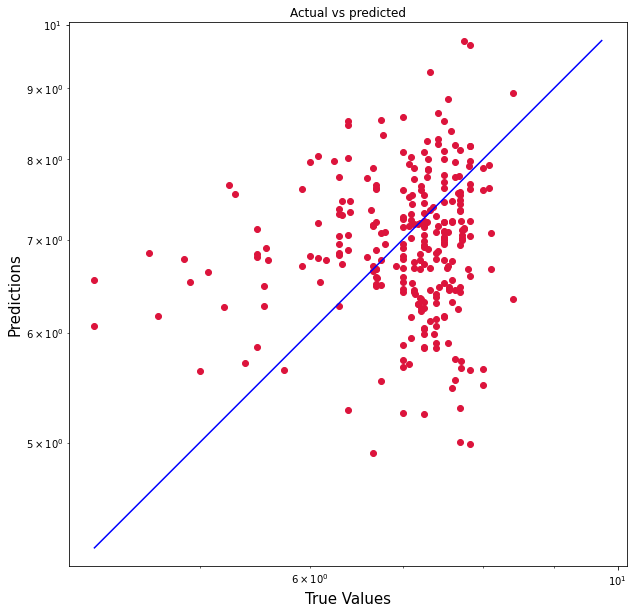

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred_trains, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_trains), max(y_train))
p2 = min(min(y_pred_trains), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Actual vs predicted')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


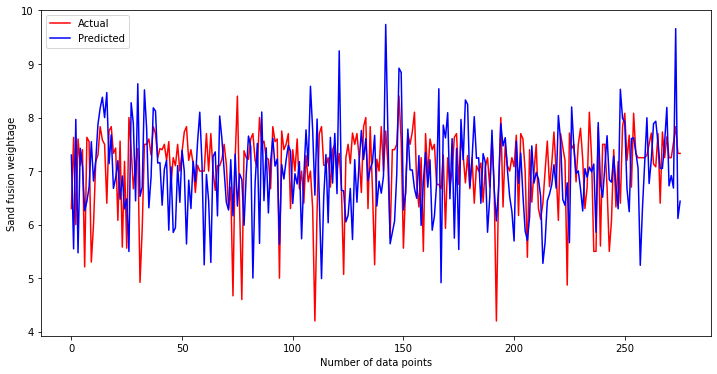

In [76]:
fig=plt.figure(figsize=(12,6))
sns.lineplot(x_train_scaled.index,y_train,color='red')
sns.lineplot(x_train_scaled.index,y_pred_trains,color='blue')
plt.xlabel('Number of data points')

plt.legend(['Actual', 'Predicted'])

# 4 OLS Model with intercept and with normalization

In [77]:
model=LinearRegression(fit_intercept=True,normalize=False)
model=model.fit(x_train_scaled,y_train)

In [78]:
print('intercept:', model.intercept_)
print('slope:', model.coef_.round(3))

intercept: 7.793976593990236
slope: [-0.304  0.752 -0.614 -0.48  -0.237  0.143  0.458 -1.567 -0.675  0.33
  1.017]


In [79]:
y_pred_trains = model.predict(x_train_scaled)
print(y_pred_trains.round(2))

[6.86 7.1  7.07 7.49 7.28 7.18 6.79 7.6  7.78 6.75 6.67 7.03 6.66 7.29
 6.89 7.36 7.06 7.49 7.16 7.31 7.46 7.38 7.31 6.99 6.91 6.95 6.53 7.72
 6.97 6.75 7.68 5.73 6.22 8.02 6.81 7.02 6.89 7.11 7.1  6.85 7.28 7.56
 7.03 7.57 7.37 7.05 7.22 7.52 7.82 7.23 7.01 7.38 6.71 7.46 7.11 6.94
 6.73 6.87 7.11 6.91 6.96 6.85 7.15 6.66 6.64 7.17 6.84 7.38 7.38 7.41
 6.61 6.84 6.91 6.99 6.93 7.31 7.17 6.38 7.57 6.83 7.31 7.6  6.81 6.9
 6.56 7.56 7.04 7.72 7.   7.5  6.42 7.15 7.42 7.76 6.55 7.06 7.1  7.68
 7.4  6.73 7.   6.7  7.49 6.55 6.65 6.94 7.4  7.18 7.19 6.92 6.51 6.87
 6.7  7.13 6.74 6.72 7.32 6.76 7.04 7.02 6.97 7.85 7.28 6.41 6.9  7.11
 6.74 6.45 7.41 7.02 6.97 7.13 7.   7.13 6.66 6.98 7.16 7.23 7.03 7.24
 6.92 6.88 8.04 7.14 6.44 7.1  7.31 6.49 7.12 7.29 6.78 6.84 7.78 7.14
 7.63 6.99 6.68 6.74 7.55 6.44 6.98 6.6  8.12 6.87 7.33 7.38 7.29 6.82
 6.85 6.37 6.65 6.68 6.92 6.86 6.96 6.98 7.61 7.43 7.39 7.68 6.73 7.56
 6.58 6.89 6.97 6.68 6.93 6.97 6.84 6.95 7.11 7.21 6.44 7.11 7.04 6.55
 7.87 7

In [80]:
y_pred_tests = model.predict(x_test_scaled)
print(y_pred_tests.round(2))

[7.15 7.23 6.73 7.11 7.23 7.03 7.11 7.09 7.93 7.49 6.69 6.59 7.49 6.74
 7.36 7.73 7.   7.26 6.94 6.69 6.7  7.28 7.18 7.19 6.8  7.39 8.04 6.71
 6.8  8.03 7.13 6.7  6.94 7.11 7.38 7.19 6.98 6.62 7.11 7.43 6.69 7.47
 6.86 6.5  7.67 7.83 6.75 6.68 7.23 7.12 7.52 6.95 6.98 7.41 7.27 6.77
 7.22 7.16 7.32 7.29 6.58 7.47 6.53 7.02 7.   7.24 7.06 7.1  6.96 7.33
 6.56 7.04 6.97 7.75 7.01 7.01 6.8  7.35 6.94 7.25 6.86 7.24 7.48 6.61
 6.82 7.34 6.94 8.   7.27 7.02 7.03 6.68]


In [81]:
ss_tot = np.sum( (y_train- y_train.mean())**2 )
ss_res = np.sum( (y_train - y_pred_trains)**2 )
r2_4=(1 - ss_res/ss_tot)
print('coefficient of determination:', r2_4.round(2))
adj_r2(r2_4)

coefficient of determination: 0.25
Adj r2 is 0.21760816085548018


In [82]:
# model performance with  intercept for test data
ss_tot_test4= np.sum( (y_test-y_test.mean())**2 )
ss_res_test4 = np.sum( (y_test - y_pred_tests)**2 )
r2_test_4=(1 - ss_res_test4/ss_tot_test4)
print(r2_test_4.round(2))
adj_r2(r2_test_4)

0.12
Adj r2 is 0.07989206680859828


In [83]:
rmse_train4=np.sqrt(mse(y_train,y_pred_trains))
print('rmse:', rmse_train4.round(2))

rmse: 0.63


In [84]:
rmse_test4=np.sqrt(mse(y_test,y_pred_tests))
print('rmse:', rmse_train4.round(2))

rmse: 0.63


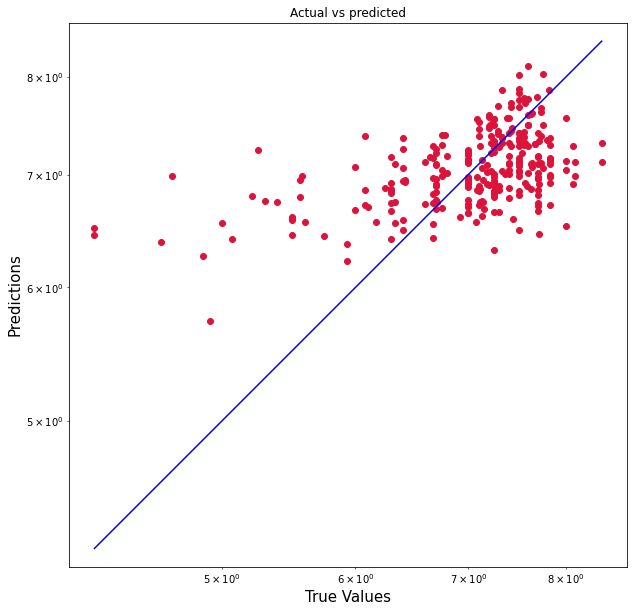

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred_trains, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_trains), max(y_train))
p2 = min(min(y_pred_trains), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Actual vs predicted')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


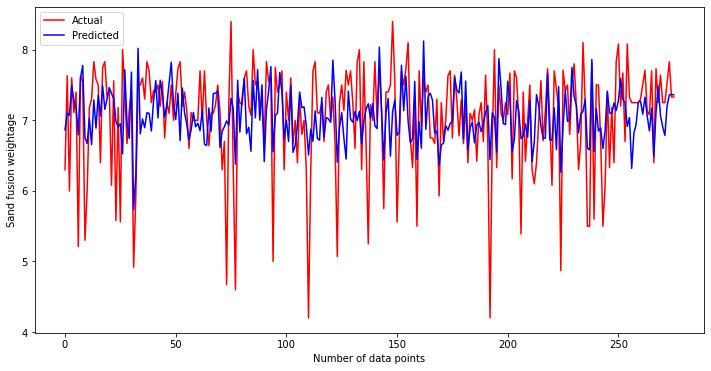

In [86]:
fig=plt.figure(figsize=(12,6))
sns.lineplot(x_train_scaled.index,y_train,color='red')
sns.lineplot(x_train_scaled.index,y_pred_trains,color='blue')
plt.xlabel('Number of data points')

plt.legend(['Actual', 'Predicted'])

# 5 Ridge Regression with intercept and normalization

In [87]:
ridge=Ridge()
model_r=ridge.fit(x_train_scaled,y_train)

In [88]:
r2_5=model_r.score(x_train_scaled,y_train)
adj_r2(r2_5)
print(r2_5)

Adj r2 is 0.21193837664765602
0.24346084158174974


In [89]:
y_pred_train_r=model_r.predict(x_train_scaled)
y_pred_test_r=model_r.predict(x_test_scaled)

In [90]:
rmse_train5=np.sqrt(mse(y_train,y_pred_train_r))
print(rmse_train5.round(2))

0.63


In [91]:
rmse_test5=np.sqrt(mse(y_test,y_pred_test_r))
print(rmse_test5.round(2))

0.59


In [92]:
# model with intercept 
ss_tot = np.sum( (y_train-y_train.mean())**2 )
ss_res = np.sum( (y_train - y_pred_train_r)**2 )
r2_5r=(1 - ss_res/ss_tot)
print(r2_5r.round(2))

0.24


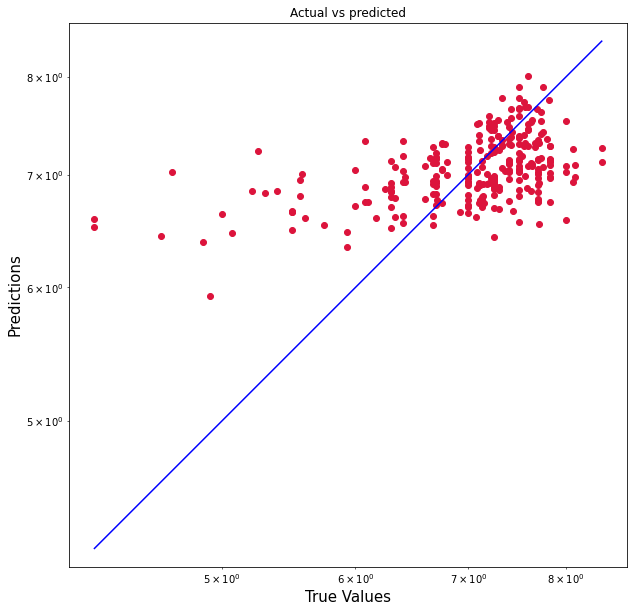

In [93]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred_train_r, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_train_r), max(y_train))
p2 = min(min(y_pred_train_r), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Actual vs predicted')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


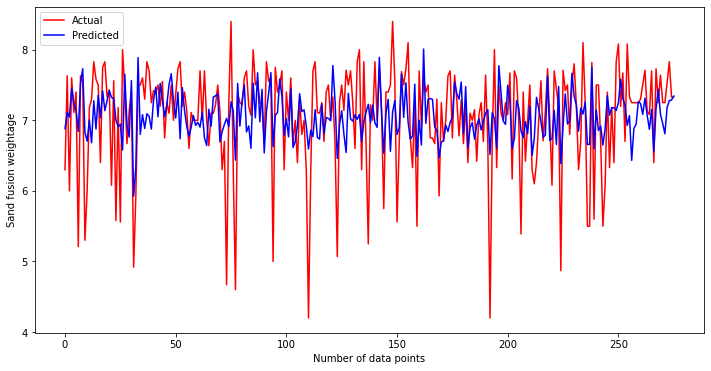

In [94]:
fig=plt.figure(figsize=(12,6))
sns.lineplot(x_train_scaled.index,y_train,color='red')
sns.lineplot(x_train_scaled.index,y_pred_train_r,color='blue')
plt.xlabel('Number of data points')

plt.legend(['Actual', 'Predicted'])

# 6 Ridge Regression without intercept and normalization

In [95]:
model_ri=Ridge(fit_intercept=False)
model_ri=model_ri.fit(x_train_scaled,y_train)

In [96]:
y_pred_train_ri=model_ri.predict(x_train_scaled)
y_pred_test_ri=model_ri.predict(x_test_scaled)

In [97]:
# model performance without  intercept 
ss_tot = np.sum( (y_train)**2 )
ss_res = np.sum( (y_train - y_pred_train_ri)**2 )
r2_6r=(1 - ss_res/ss_tot)
print(r2_6r.round(2))
adj_r2(r2_6r)

0.98
Adj r2 is 0.9779861608449694


In [98]:
y_pred_test_ri=model_ri.predict(x_test_scaled)

In [99]:
# model performance without  intercept for test data
ss_tot_test6r= np.sum( (y_test)**2 )
ss_res_test6r = np.sum( (y_test - y_pred_test_ri)**2 )
r2_test_6r=(1 - ss_res_test6r/ss_tot_test6r)
print(r2_test_6r.round(2))
adj_r2(r2_test_6r)

0.98
Adj r2 is 0.9753020815374777


In [100]:
rmse_train6=np.sqrt(mse(y_train,y_pred_train_ri))
print(rmse_train6.round(2))

1.03


In [101]:
rmse_test6=np.sqrt(mse(y_test,y_pred_test_ri))
print(rmse_test6.round(2))

1.11


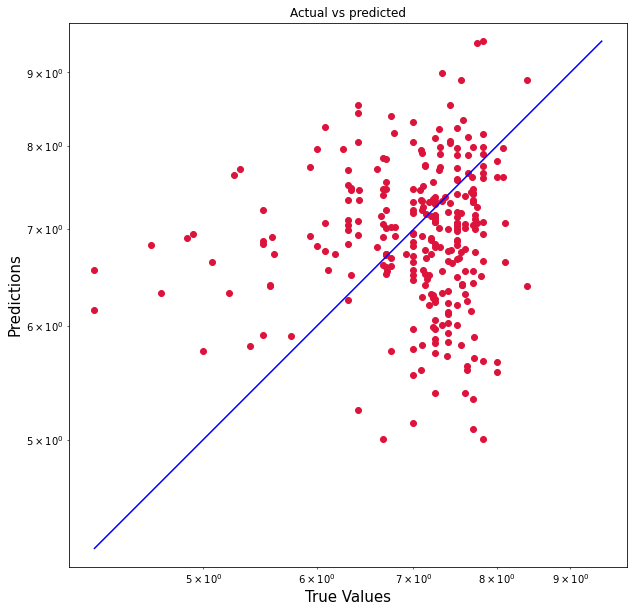

In [102]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred_train_ri, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_train_ri), max(y_train))
p2 = min(min(y_pred_train_ri), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Actual vs predicted')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


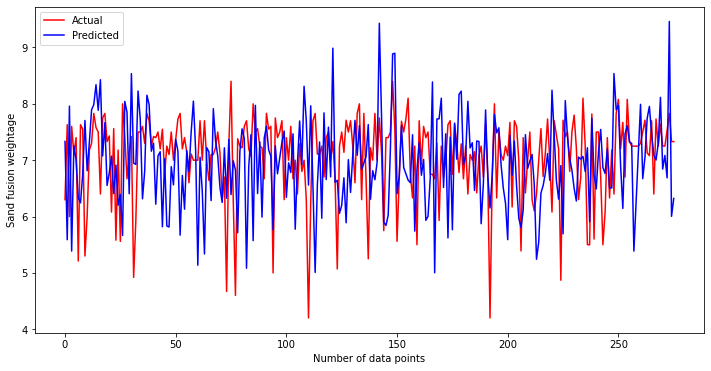

In [103]:
fig=plt.figure(figsize=(12,6))
sns.lineplot(x_train_scaled.index,y_train,color='red')
sns.lineplot(x_train_scaled.index,y_pred_train_ri,color='blue')
plt.xlabel('Number of data points')

plt.legend(['Actual', 'Predicted'])

## 7 SVM with hyper parameter

In [104]:
svr_l = SVR(kernel = 'linear')
svr_l.fit(x_train_scaled, y_train)

SVR(kernel='linear')

In [105]:
y_pred_train_svr_l = svr_l.predict(x_train_scaled)

In [106]:
y_pred_test_svr_l = svr_l.predict(x_test_scaled)

In [107]:
r2_7=r2_score(y_train,y_pred_train_svr_l)
adj_r2(r2_7)

Adj r2 is 0.13579701308935133


In [108]:
#train rmse
np.sqrt(mse(y_train, y_pred_train_svr_l))

0.6626803305283889

In [109]:
#test rmse
np.sqrt(mse(y_test, y_pred_test_svr_l))

0.5638063464835829

In [110]:
svr_r = SVR(kernel = 'rbf')
svr_r.fit(x_train_scaled, y_train)

SVR()

In [111]:
y_pred_train_svr_r = svr_r.predict(x_train_scaled)
r2_8=r2_score(y_train,y_pred_train_svr_r)
adj_r2(r2_8)
print(r2_8)

Adj r2 is 0.582155125326218
0.5988689203131694


In [112]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [113]:
svr_hyp = RandomizedSearchCV(svr_r, param_grid, scoring='neg_root_mean_squared_error', n_jobs = -1, random_state = 0, return_train_score = True )

In [114]:
svr_hyp.fit(x_train_scaled,y_train)

RandomizedSearchCV(estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   random_state=0, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [115]:
print(svr_hyp.best_params_)
print(svr_hyp.best_estimator_)
print(svr_hyp.best_score_)

{'kernel': 'rbf', 'gamma': 1, 'C': 1}
SVR(C=1, gamma=1)
-0.6460181457548415


In [116]:
y_pred_train_svr_hyp = svr_hyp.predict(x_train_scaled)
y_pred_test_svr_hyp = svr_hyp.predict(x_test_scaled)

#performance for train data
r2_9=r2_score(y_train,y_pred_train_svr_hyp)
adj_r2(r2_9)
print(r2_9)

Adj r2 is 0.3376002518204899
0.3640962417476703


In [117]:
# performance for test data
r2_test_9=r2_score(y_test,y_pred_test_svr_hyp)
adj_r2(r2_test_9)
print(r2_test_9)

Adj r2 is 0.2127672531922895
0.24425656306459798


## 8 Random Forest:

In [118]:
rf = RandomForestRegressor(n_estimators = 200, random_state = 0) 

In [119]:
rf.fit(x_train_scaled,y_train)

y_pred_train_rf = rf.predict(x_train_scaled)

# performance for train data

r2_rf=r2_score(y_train,y_pred_train_rf)
adj_r2(r2_rf)
print("r2_rf:",r2_rf)



Adj r2 is 0.8972198350176008
r2_rf: 0.9013310416168968


In [120]:
y_pred_test_rf = rf.predict(x_test_scaled)

In [121]:
# performance for test data
r2_test_rf=r2_score(y_test,y_pred_test_rf)
adj_r2(r2_test_rf)
print("r2_test_rf:",r2_test_rf)   

Adj r2 is 0.11586290090691198
r2_test_rf: 0.1512283848706355


In [122]:
#train rmse
rmse_rf=np.sqrt(mse(y_train, y_pred_train_rf))
print("rmse_rf:",rmse_rf)
#test rmse
np.sqrt(mse(y_test, y_pred_test_rf))

rmse_rf: 0.2285340172726861


0.5807279232228576

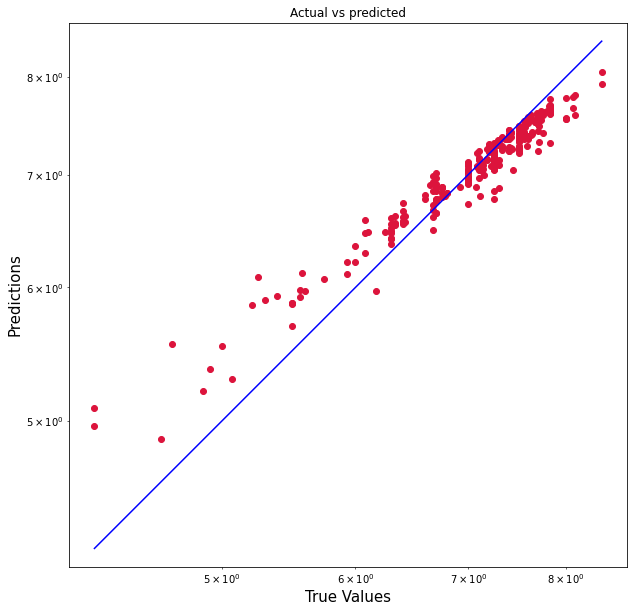

In [123]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred_train_rf, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_train_rf), max(y_train))
p2 = min(min(y_pred_train_rf), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Actual vs predicted')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


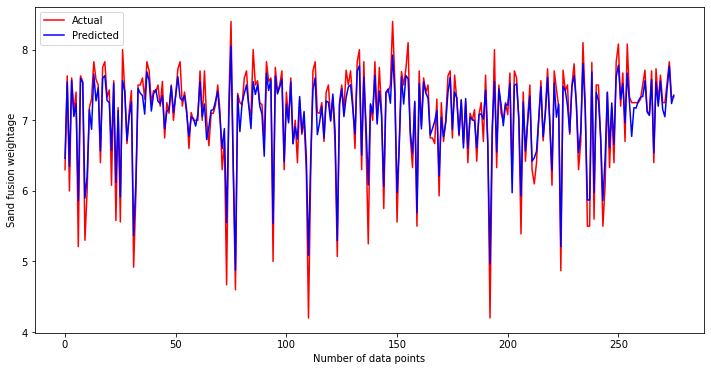

In [124]:
fig=plt.figure(figsize=(12,6))
sns.lineplot(x_train_scaled.index,y_train,color='red')
sns.lineplot(x_train_scaled.index,y_pred_train_rf,color='blue')
plt.xlabel('Number of data points')

plt.legend(['Actual', 'Predicted'])

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


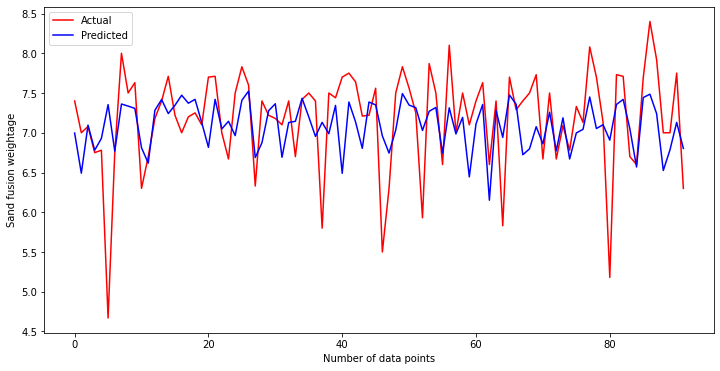

In [125]:
# for test data 
fig=plt.figure(figsize=(12,6))
sns.lineplot(x_test_scaled.index,y_test,color='red')
sns.lineplot(x_test_scaled.index,y_pred_test_rf,color='blue')
plt.xlabel('Number of data points')

plt.legend(['Actual', 'Predicted'])

 ## 9 Gradient Boosting:

In [126]:
gbr = GBR(random_state = 0)

In [127]:
gbr.fit(x_train_scaled,y_train)
y_pred_train_gbr = gbr.predict(x_train_scaled)
y_pred_test_gbr = gbr.predict(x_test_scaled)

In [128]:
# performance for train data
r2_gbr=r2_score(y_train,y_pred_train_gbr)
print(r2_gbr)
adj_r2(r2_gbr)

0.8724065024678673
Adj r2 is 0.8670901067373618


In [129]:
# performance for test data
r2_test_gbr=r2_score(y_test,y_pred_test_gbr)
adj_r2(r2_test_gbr)
print("r2_test_gbr:",r2_test_gbr)  

Adj r2 is 0.14220477087397987
r2_test_gbr: 0.1765165800390207


In [130]:
#train rmse
rmse_train=np.sqrt(mse(y_train, y_pred_train_gbr))
print(rmse_train)
#test rmse
rmse_test=np.sqrt(mse(y_test, y_pred_test_gbr))

0.25988119392458464


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


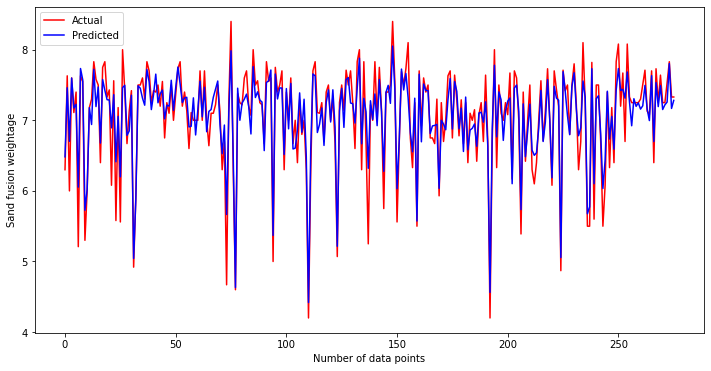

In [131]:
# for train data
fig=plt.figure(figsize=(12,6))
sns.lineplot(x_train_scaled.index,y_train,color='red')
sns.lineplot(x_train_scaled.index,y_pred_train_gbr,color='blue')
plt.xlabel('Number of data points')

plt.legend(['Actual', 'Predicted'])

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


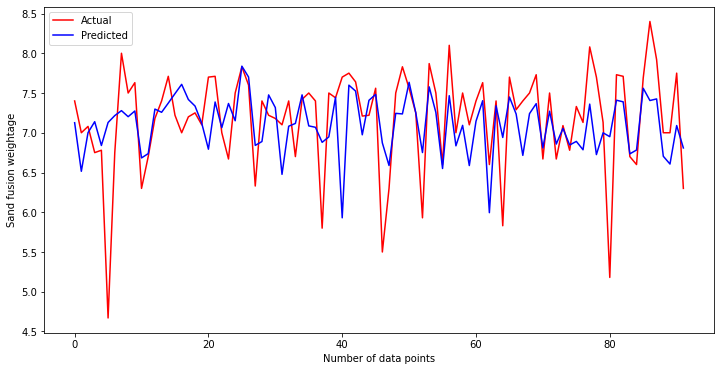

In [132]:
# for test data 
fig=plt.figure(figsize=(12,6))
sns.lineplot(x_test_scaled.index,y_test,color='red')
sns.lineplot(x_test_scaled.index,y_pred_test_gbr,color='blue')
plt.xlabel('Number of data points')

plt.legend(['Actual', 'Predicted'])

## 10 XGBoost:

In [133]:
xgb = xg.XGBRegressor(objective='reg:squarederror')
xgb.fit(x_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
y_pred_train_xgb = xgb.predict(x_train_scaled)
y_pred_test_xgb = xgb.predict(x_test_scaled)

In [135]:
# performance for train data
r2_xgb=r2_score(y_train,y_pred_train_xgb)
print(r2_xgb)
adj_r2(r2_xgb)

0.9988864813652717
Adj r2 is 0.9988400847554914


In [136]:
# performance for test data 
r2_test_xgb=r2_score(y_test,y_pred_test_xgb)
adj_r2(r2_test_xgb)
print("r2_test_xgb:",r2_test_xgb)  

Adj r2 is -0.17727907258872966
r2_test_xgb: -0.13018790968518057


In [137]:
#train rmse
rmse_train_xgb=np.sqrt(mse(y_train, y_pred_train_xgb))
print(rmse_train_xgb)
#test rmse
rmse_test_xgb=np.sqrt(mse(y_test, y_pred_test_xgb))
print(rmse_test_xgb)

0.024277799857187726
0.6701200521937748


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


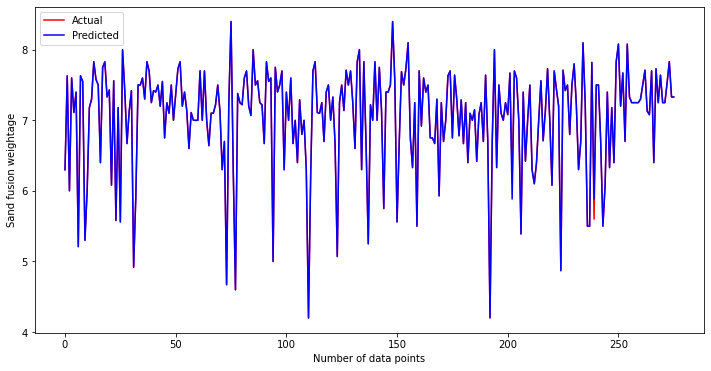

In [138]:
# for train data
fig=plt.figure(figsize=(12,6))
sns.lineplot(x_train_scaled.index,y_train,color='red')
sns.lineplot(x_train_scaled.index,y_pred_train_xgb,color='blue')
plt.xlabel('Number of data points')

plt.legend(['Actual', 'Predicted'])

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


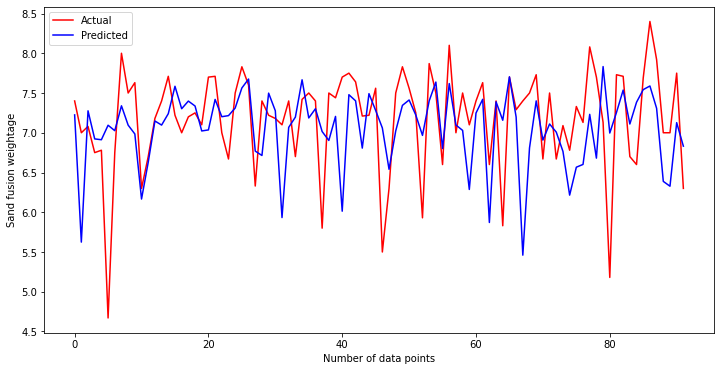

In [139]:
# for test data 
fig=plt.figure(figsize=(12,6))
sns.lineplot(x_test_scaled.index,y_test,color='red')
sns.lineplot(x_test_scaled.index,y_pred_test_xgb,color='blue')
plt.xlabel('Number of data points')

plt.legend(['Actual', 'Predicted'])